<a href="https://colab.research.google.com/github/soobin2121/ML_EDU/blob/master/samsung%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
s%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pandas.plotting import register_matplotlib_converters

In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (20,10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import math
from datetime import date, timedelta
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from IPython.core.display import display, HTML
from pandas_profiling import ProfileReport

In [ ]:
from google.colab import drive
ROOT = "/content/drive" 
print(ROOT) 
drive.mount(ROOT)  

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks'/'samsung'

/content/drive/My Drive/Colab Notebooks/samsung


In [ ]:
%ls

trend_w_demo.csv


In [ ]:
data = pd.read_csv("trend_w_demo.csv", encoding='CP949')
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low


In [ ]:
data['YM'].unique()

array([202005, 202004, 201905, 201904])

In [ ]:
data['Category'].unique()

array(['할인점', '취미', '오픈마켓/소셜', '뷰티', '디저트', '전문몰', '항공/여행사', '종합몰',
       '호텔/숙박', '면세점'], dtype=object)

In [ ]:
data['기혼스코어'].unique()

array(['high', 'mid', 'low'], dtype=object)

In [ ]:
#data["기혼스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)
#data["유아자녀스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)
#data["초등학생자녀스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)
#data["중고생자녀스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)
#data["대학생자녀스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)
#data["전업주부스코어"].replace({"high": 3, "mid": 2, "low":1}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452038 entries, 0 to 452037
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   YM         452038 non-null  int64 
 1   Category   452038 non-null  object
 2   성별구분       452038 non-null  int64 
 3   연령대        452038 non-null  object
 4   기혼스코어      452038 non-null  object
 5   유아자녀스코어    452038 non-null  object
 6   초등학생자녀스코어  452038 non-null  object
 7   중고생자녀스코어   452038 non-null  object
 8   대학생자녀스코어   452038 non-null  object
 9   전업주부스코어    452038 non-null  object
dtypes: int64(2), object(8)
memory usage: 34.5+ MB


In [ ]:
data1 = data.groupby(['Category']).count()['연령대'].sort_values(ascending=False)
data1.head()

Category
전문몰        126062
디저트         89743
할인점         84636
오픈마켓/소셜     80742
뷰티          20453
Name: 연령대, dtype: int64

In [ ]:
data1.plot(kind='barh', figsize=(15,5), title='카테고리 별 결제 순위')
plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


In [ ]:
data['성별구분']=data['성별구분'].replace([1],'여성')
data['성별구분']=data['성별구분'].replace([0],'남성')
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,남성,F,high,low,high,mid,low,low
1,202005,취미,남성,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,여성,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,남성,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,남성,G,high,low,mid,mid,mid,low


In [ ]:
data2= data[(data['YM']== 202004) | (data['YM']== 202005)]
data3= data[(data['YM']== 201904) | (data['YM']== 201905)]

In [ ]:
housewife=data2['전업주부스코어'].value_counts()
housewife

low     107847
mid      93545
high      9076
Name: 전업주부스코어, dtype: int64

In [ ]:
%matplotlib inline

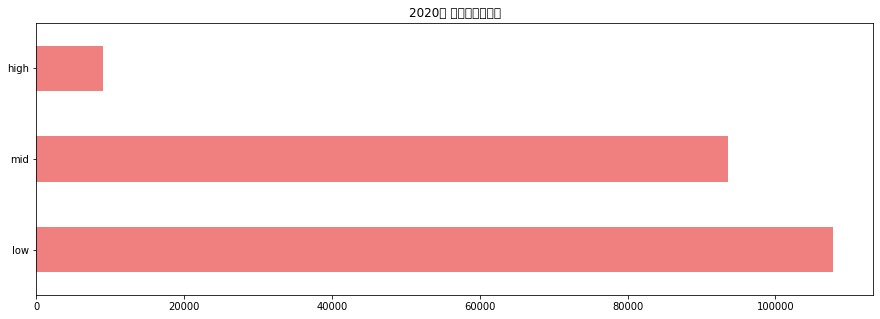

In [ ]:
housewife=data2['전업주부스코어'].value_counts()
housewife= housewife.plot(kind='barh',figsize=(15,5),color='lightcoral',title='2020년 전업주부스코어')
plt.show()

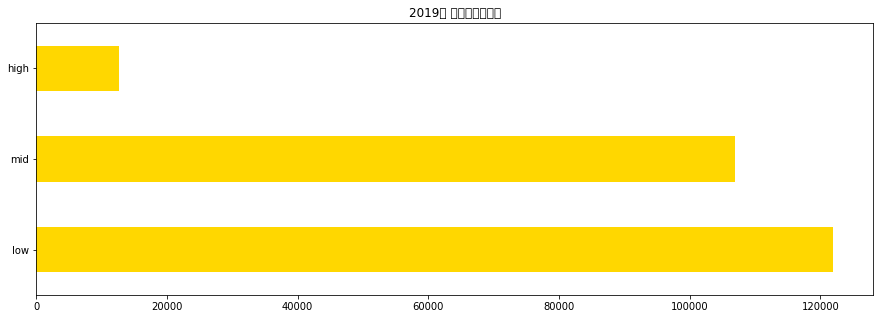

In [ ]:
housewife=data3['전업주부스코어'].value_counts()
housewife= housewife.plot(kind='barh',figsize=(15,5), color='gold', title='2019년 전업주부스코어')

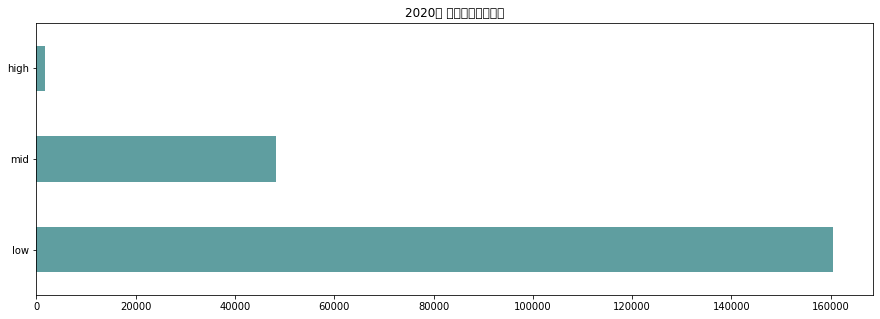

In [ ]:
school=data2['대학생자녀스코어'].value_counts()
school= school.plot(kind='barh',figsize=(15,5), color='cadetblue',title='2020년 대학생자녀스코어')

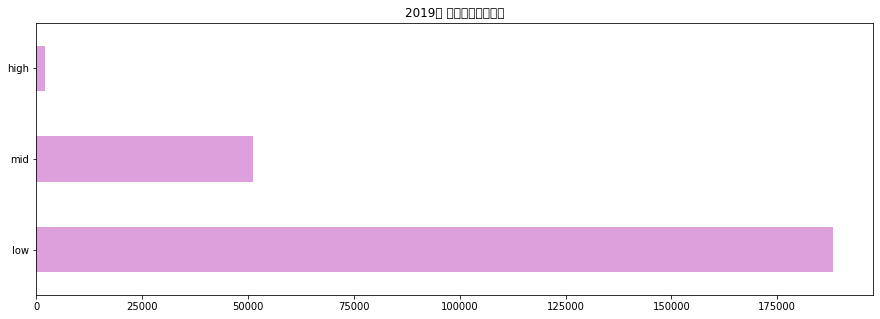

In [ ]:
school=data3['대학생자녀스코어'].value_counts()
school= school.plot(kind='barh',figsize=(15,5), color='plum',title='2019년 대학생자녀스코어')


1. 2019년 카테고리 별 결제 순위(성별로)
2. 2020년 카테고리 별 결제 순위(성별로)
3. 2019년 연령별 건수( 성별로)
4. 2020년 연령별 건수(성별로)



In [ ]:
data['성별구분']=data['성별구분'].replace([0],'여성')
data['성별구분']=data['성별구분'].replace([1],'남성')
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,남성,F,high,low,high,mid,low,low
1,202005,취미,남성,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,여성,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,남성,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,남성,G,high,low,mid,mid,mid,low


In [ ]:
data['성별구분'].value_counts()

여성    240336
남성    211702
Name: 성별구분, dtype: int64

In [ ]:
data['Category'].value_counts()

전문몰        126062
디저트         89743
할인점         84636
오픈마켓/소셜     80742
뷰티          20453
취미          18449
종합몰         16119
호텔/숙박        8005
항공/여행사       5761
면세점          2068
Name: Category, dtype: int64

In [ ]:
new_data= data.groupby(['Category','성별구분'])['연령대'].count().unstack('성별구분')
new_data

성별구분,남성,여성
Category,,
디저트,42316,47427
면세점,1095,973
뷰티,6958,13495
오픈마켓/소셜,35480,45262
전문몰,60331,65731
종합몰,4960,11159
취미,11606,6843
할인점,40350,44286
항공/여행사,3165,2596


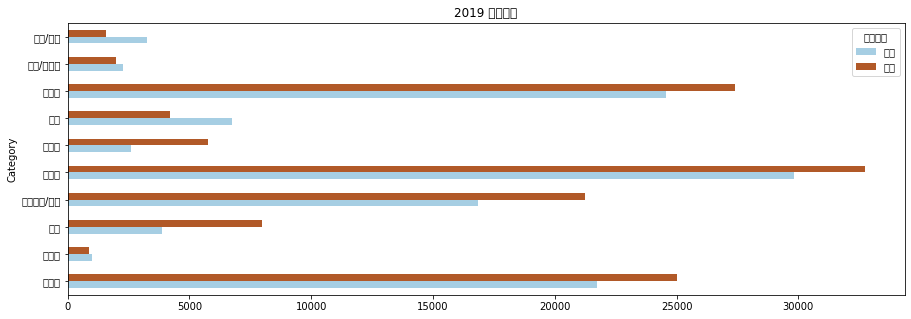

In [ ]:
new_data= data3.groupby(['Category','성별구분'])['연령대'].count().unstack('성별구분')

new_data= new_data.plot(kind='barh',figsize=(15,5), colormap='Paired',title='2019 결제순위')

plt.show()

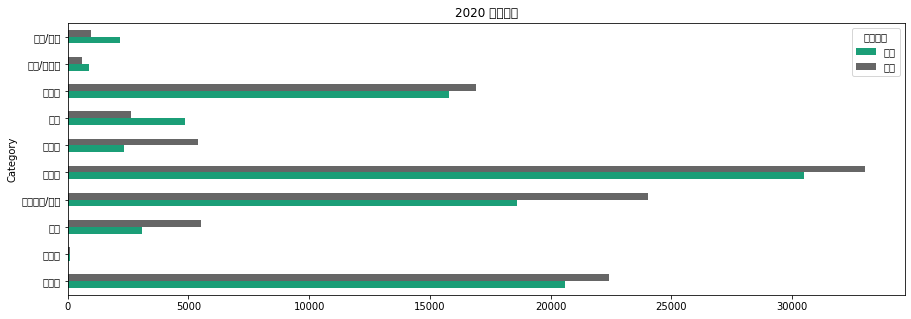

In [ ]:
new_data2= data2.groupby(['Category','성별구분'])['연령대'].count().unstack('성별구분')

new_data= new_data2.plot(kind='barh',figsize=(15,5), colormap='Dark2',title='2020 결제순위')

plt.show()

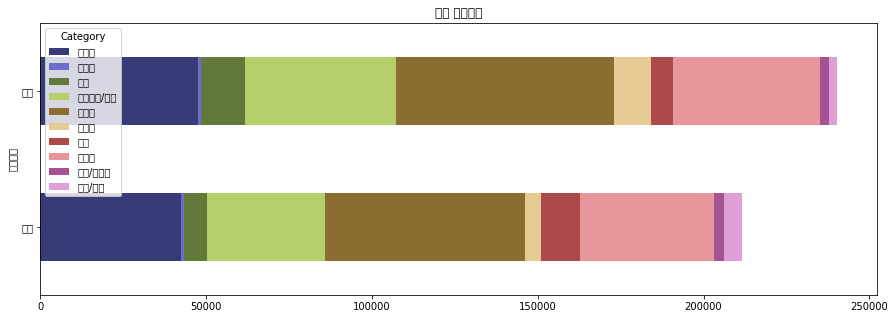

In [ ]:
new_data3= data.groupby(['Category','성별구분'])['성별구분'].count().unstack('Category')

new_data= new_data3.plot(kind='barh',figsize=(15,5), colormap='tab20b',stacked=True, title='성별 결제순위')

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
from statsmodels.graphics.mosaicplot import mosaic

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


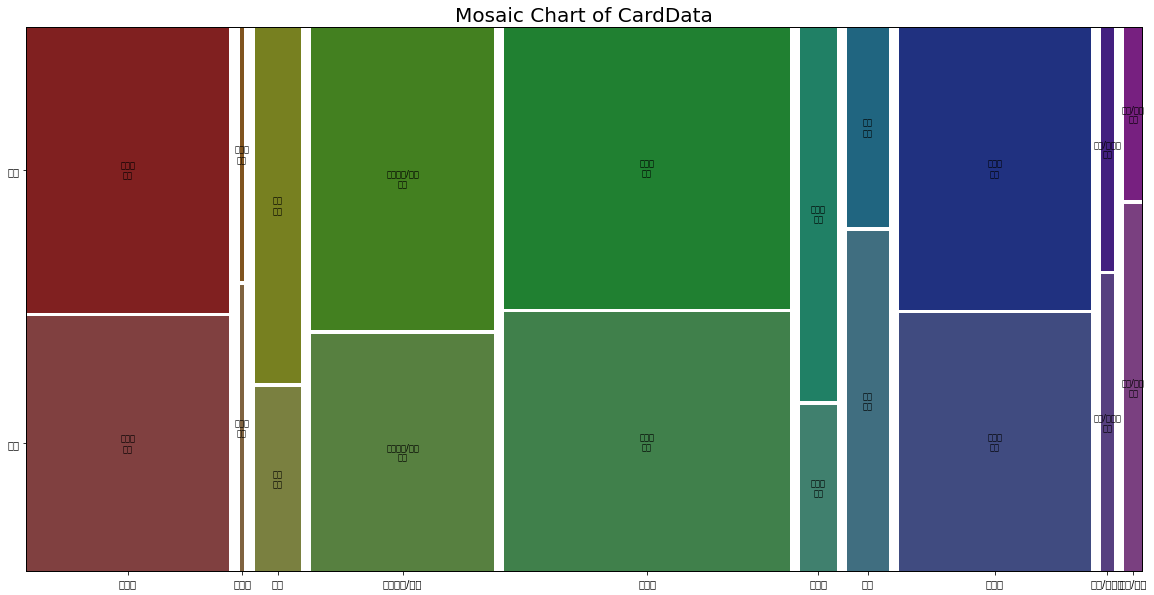

In [ ]:
mosaic(data.sort_values('Category'), ['Category', '성별구분'], gap=0.01) 

plt.title('Mosaic Chart of CardData', fontsize=20)
    
plt.show()

In [ ]:
Ages={"A":"40-44","B":"35-39","C":"25-29","D":"30-44","E":"20-24","F":"45-49","G":"50-54","H":"55-59"}
data['Age']=data['연령대'].map(Ages)
data.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Age
0,202005,할인점,남성,F,high,low,high,mid,low,low,45-49
1,202005,취미,남성,B,high,low,mid,mid,low,low,35-39
2,202005,오픈마켓/소셜,여성,D,mid,mid,mid,mid,low,mid,30-44
3,202005,뷰티,남성,D,mid,mid,mid,mid,low,low,30-44
4,202005,오픈마켓/소셜,남성,G,high,low,mid,mid,mid,low,50-54


In [ ]:
new_data5 = data.groupby(['Category','Age'])['Age'].count().unstack('Age')
new_data5

Age,20-24,25-29,30-44,35-39,40-44,45-49,50-54,55-59
Category,,,,,,,,
디저트,11251,10969,14606,6857,14086,14260,10656,7058
면세점,288,301,311,199,252,283,242,192
뷰티,4327,2767,2498,1519,2377,2921,2442,1602
오픈마켓/소셜,10569,11996,16564,4074,14565,12311,7265,3398
전문몰,15265,15985,21272,10055,20149,19831,14380,9125
종합몰,1541,2458,3862,665,3350,2419,1267,557
취미,3423,2048,2272,1739,2196,2682,2292,1797
할인점,5654,7899,12490,8865,12781,13591,11093,12263
항공/여행사,868,774,1006,464,799,771,653,426


In [ ]:
data_2004= data[data['YM']==202004]
data_2004.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Age
109094,202004,오픈마켓/소셜,여성,D,mid,mid,low,mid,low,low,30-44
109095,202004,디저트,여성,B,high,low,high,mid,mid,mid,35-39
109096,202004,전문몰,남성,E,low,low,low,low,low,low,20-24
109097,202004,전문몰,여성,D,mid,mid,mid,mid,low,mid,30-44
109098,202004,오픈마켓/소셜,여성,E,mid,high,low,low,low,mid,20-24


In [ ]:
data_2005= data[data['YM']==202005]
data_2005.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Age
0,202005,할인점,남성,F,high,low,high,mid,low,low,45-49
1,202005,취미,남성,B,high,low,mid,mid,low,low,35-39
2,202005,오픈마켓/소셜,여성,D,mid,mid,mid,mid,low,mid,30-44
3,202005,뷰티,남성,D,mid,mid,mid,mid,low,low,30-44
4,202005,오픈마켓/소셜,남성,G,high,low,mid,mid,mid,low,50-54


In [ ]:
data_1904= data[data['YM']==201904]
data_1904.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Age
331919,201904,할인점,남성,H,high,low,low,low,low,low,55-59
331920,201904,할인점,남성,E,low,low,low,low,low,low,20-24
331921,201904,할인점,여성,A,high,low,mid,mid,low,mid,40-44
331922,201904,전문몰,여성,D,high,mid,high,mid,low,high,30-44
331923,201904,취미,남성,F,high,mid,high,mid,mid,low,45-49


In [ ]:
data_1905= data[data['YM']==201905]
data_1905.head()

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어,Age
210468,201905,전문몰,여성,E,low,low,low,low,low,mid,20-24
210469,201905,전문몰,여성,E,mid,mid,low,low,low,mid,20-24
210470,201905,할인점,여성,F,high,low,mid,mid,mid,mid,45-49
210471,201905,전문몰,남성,G,high,low,mid,mid,mid,low,50-54
210472,201905,전문몰,여성,H,high,low,low,low,mid,mid,55-59


In [ ]:
new_data_2004 = data_2004.groupby(['Category','Age'])['Age'].count().unstack('Category')
new_data_2005 = data_2005.groupby(['Category','Age'])['Age'].count().unstack('Category')

In [ ]:
new_data_2004_cake = new_data_2004['디저트']
new_data_2005_cake = new_data_2005['디저트']
cake= pd.merge(new_data_2004_cake,new_data_2005_cake,how='outer',on='Age')
cake

,디저트_x,디저트_y
Age,,
20-24,2317.0,2571
25-29,2510.0,2777
30-44,3270.0,3601
35-39,1561.0,1858
40-44,3170.0,3591
45-49,3272.0,3543
50-54,2507.0,2854
55-59,1652.0,1951


In [ ]:

sns.catplot(x="", kind="bar", data=cake);

ValueError: ignored

In [ ]:
new_data_2005 = data_2005.groupby(['Category','Age'])['Age'].count().unstack('Age')
new_data_2005

In [ ]:
new_data_1904 = data_1904.groupby(['Category','Age'])['Age'].count().unstack('Age')
new_data_1904

In [ ]:
new_data_1905 = data_1905.groupby(['Category','Age'])['Age'].count().unstack('Age')
new_data_1905